In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Reshape, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D,UpSampling2D
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.layers import merge, Input
import numpy as np
from keras.callbacks import ModelCheckpoint, Callback, CSVLogger, LearningRateScheduler
from scipy.misc import imshow, imread, imresize, imsave

Using Theano backend.
Using gpu device 0: Quadro K2200 (CNMeM is disabled, cuDNN not available)


In [3]:
temp1 = VGG16(include_top=False, weights='imagenet',input_tensor=Input(shape=(3, 240, 320))) #input_shape=(3,320,240))

In [4]:
data = np.load("newdataset1.npz")
sxtrain1 = data["xtrain"]
sytrain1 = data["ytrain"]

#sxtrain1 = np.load('xlabeled.npy')
#sytrain1 = np.load('ylabeled.npy')

print(sxtrain1.shape)
print(sxtrain1.dtype)
print(sytrain1.shape)
print(sytrain1.dtype)



#print(len(temp1.layers))
#temp1.summary()

(1449, 3, 240, 320)
uint8
(1449, 57, 77)
float32


In [5]:
sxtrain2 = sxtrain1[:1049,:,:,:]
sytrain2 = sytrain1[:1049,:,:]
sxtest2 = sxtrain1[1049:,:,:,:]
sytest2 = sytrain1[1049:,:,:]
print(sxtrain2.shape)
print(sxtrain2.dtype)
print(sytrain2.shape)
print(sytrain2.dtype)
print(sxtest2.shape)
print(sxtest2.dtype)
print(sytest2.shape)
print(sytest2.dtype)

(1049, 3, 240, 320)
uint8
(1049, 57, 77)
float32
(400, 3, 240, 320)
uint8
(400, 57, 77)
float32


In [6]:
#matplotlib gotchas... execute before proceeding..
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

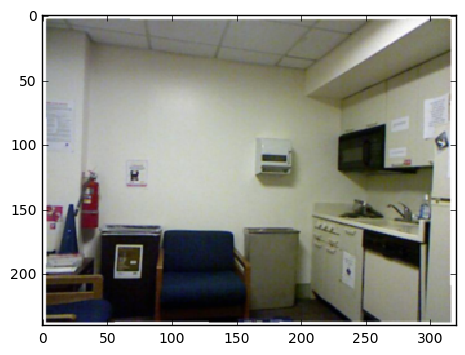

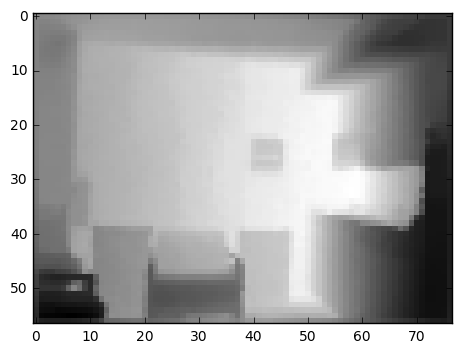

In [7]:
xt1 = sxtrain2[0]
cimg1 = np.zeros((240,320,3),dtype=np.uint8)
cimg1[:,:,0] = xt1[0,:,:]
cimg1[:,:,1] = xt1[1,:,:]
cimg1[:,:,2] = xt1[2,:,:]

plt.imshow(cimg1)
plt.show()
plt.imshow(sytrain2[0])
plt.show()

In [8]:
#temp1.save_weights('bigger.h5')
print(sytrain2[0][0])

[ 2.74909854  2.7440784   2.74896407  2.75411344  2.76488996  2.78457403
  2.80010843  2.81197596  2.81951928  2.82893682  2.83852434  2.84578776
  2.85300207  2.85855389  2.86205006  2.86515307  2.86242199  2.86114311
  2.86220574  2.86217594  2.86187029  2.8615427   2.86086965  2.85987329
  2.85867405  2.85679626  2.85489511  2.85234499  2.84925508  2.84614873
  2.84294915  2.83997369  2.83674598  2.83317661  2.8290689   2.82358742
  2.81907415  2.8146584   2.81021452  2.80570197  2.80080128  2.795156
  2.7883954   2.7808609   2.77170205  2.76341701  2.75432754  2.7449913
  2.73599243  2.72576666  2.71512079  2.6998682   2.68517756  2.67303061
  2.66012454  2.64540458  2.62900996  2.6087296   2.58659387  2.5587883
  2.5163815   2.47860527  2.45196223  2.42301273  2.3895402   2.35959935
  2.33856416  2.32109046  2.29873276  2.28882599  2.27895737  2.26836705
  2.23180842  2.2246356   2.22206998  2.2219696   2.23994255]


In [9]:
#mean subtraction for the sample batch of images...
sxtrain2 = sxtrain2.astype("float32")
sytrain2 = sytrain2.astype("float32")
sxtest2 = sxtest2.astype("float32")
sytest2 = sytest2.astype("float32")


sxtrain2[:,0,:,:] -= 103.939
sxtrain2[:,1,:,:] -= 116.779
sxtrain2[:,2,:,:] -= 123.68
sxtest2[:,0,:,:] -= 103.939
sxtest2[:,1,:,:] -= 116.779
sxtest2[:,2,:,:] -= 123.68

sxtrain2 /= 255
sxtest2 /= 255
#sytrain1 /= 6553.6
print sytrain2[0][0]
print "----------------------------------"
print sytest2[0][0]

[ 2.74909854  2.7440784   2.74896407  2.75411344  2.76488996  2.78457403
  2.80010843  2.81197596  2.81951928  2.82893682  2.83852434  2.84578776
  2.85300207  2.85855389  2.86205006  2.86515307  2.86242199  2.86114311
  2.86220574  2.86217594  2.86187029  2.8615427   2.86086965  2.85987329
  2.85867405  2.85679626  2.85489511  2.85234499  2.84925508  2.84614873
  2.84294915  2.83997369  2.83674598  2.83317661  2.8290689   2.82358742
  2.81907415  2.8146584   2.81021452  2.80570197  2.80080128  2.795156
  2.7883954   2.7808609   2.77170205  2.76341701  2.75432754  2.7449913
  2.73599243  2.72576666  2.71512079  2.6998682   2.68517756  2.67303061
  2.66012454  2.64540458  2.62900996  2.6087296   2.58659387  2.5587883
  2.5163815   2.47860527  2.45196223  2.42301273  2.3895402   2.35959935
  2.33856416  2.32109046  2.29873276  2.28882599  2.27895737  2.26836705
  2.23180842  2.2246356   2.22206998  2.2219696   2.23994255]
----------------------------------
[ 1.35280406  1.30760574  1.343

In [10]:
sytrain2.dtype

dtype('float32')

In [ ]:
t1 = np.load('xtesting.npy')
t2 = np.load('ytesting.npy')

sxtest1 = t1
sytest1 = t2

print(sxtest1.shape)
print(sytest1.shape)
print(sytest1.dtype)

sxtest1 = sxtest1.astype("float32")
sytest1 = sytest1.astype("float32")


sxtest1[:,0,:,:] -= 103.939
sxtest1[:,1,:,:] -= 116.779
sxtest1[:,2,:,:] -= 123.68

sxtest1 /= 255
sytest1 /= 6553.6
print sytest1[0][0]

In [11]:
#from keras.models import Model

#temp2 = Model()
#temp2.add(Flatten(input_shape=(512,7,10)))
#temp2.summary()
outtemp1 = temp1.layers[18].output
#print(outtemp1)

start1 = Flatten()(outtemp1)
start1 = Dense(5120, activation='relu', init='glorot_normal', W_regularizer=l2(0.02))(start1)
start1 = Dropout(0.5)(start1)
start1 = Dense(4389, activation='relu', init='glorot_normal', W_regularizer=l2(0.02))(start1)
start1 = Reshape((57,77),input_shape=(4389,),name='outputFC')(start1)

model2 = Model(input=temp1.layers[0].input, output=start1)


In [12]:
#fine network for finer depth output...
#trying it with 128 number of filters...
input3 = Input(shape=(3,240,320), name='fine_input')
br1 = MaxPooling2D((2,2), strides=(2,2))(input3)
br1 = Convolution2D(63,7,7, activation='relu', init='glorot_normal')(br1)
br1 = MaxPooling2D((2,2), strides=(2,2))(br1)
samp1 = Reshape((1,57,77), input_shape=(57,77))(start1)
samp1 = Lambda(lambda x: x/10)(samp1)
br1 = merge([br1,samp1], mode='concat', concat_axis = 1)
br1 = Convolution2D(64,3,3, activation='relu', init='glorot_normal')(br1)
br1 = ZeroPadding2D((1,1), input_shape=(64,55,75))(br1)
br1 = Convolution2D(128,3,3, activation='relu', init='glorot_normal')(br1)
br1 = ZeroPadding2D((1,1), input_shape=(128,55,75))(br1)
br1 = Convolution2D(1,3,3, activation='relu')(br1)
br1 = ZeroPadding2D((1,1), input_shape=(128,55,75))(br1)

#br1 = Flatten()(br1)
#br1 = Dense(5120, activation='relu', init='glorot_normal', W_regularizer=l2(0.02))(br1)
#br1 = Dropout(0.5)(br1)
#br1 = Dense(4389, activation='relu', init='glorot_normal', W_regularizer=l2(0.02))(br1)
#br1 = Reshape((57,77),input_shape=(4389,),name='outputFC')(br1)

br1 = Reshape((57,77),input_shape=(1,57,77), name='outputfine')(br1)

f1 = Model(input=[input3,temp1.layers[0].input], output=[start1,br1])
f1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  1792        input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [13]:
for i in range(0,len(temp1.layers)-5):
    temp1.layers[i].trainable = False
temp1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  0           input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  0           block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [14]:
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  0           input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  0           block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [15]:
model2.load_weights('weight_newarch_epoch_300_coarse.h5')

In [16]:
for i in range(len(model2.layers)):
    model2.layers[i].trainable = False
    
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  0           input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  0           block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [17]:
from keras import backend as K             
                  
def custom_rmse1(y_true,y_pred):
    ind = np.nonzero(y_true)
    y_pred = y_pred[ind[0],ind[1], ind[2]]
    print(y_pred.dtype)
    y_true = y_true[ind[0],ind[1], ind[2]]
    print(y_true.dtype)
    temp1 = abs(y_pred - y_true)
    print(temp1.dtype)
    temp2 = K.square(temp1)
    print(temp2.dtype)
    temp3 = K.mean(temp2)
    print(temp3.dtype)
    t1 = K.sqrt(temp3)
    #print(t1.dtype)
    return t1   

(57, 77)


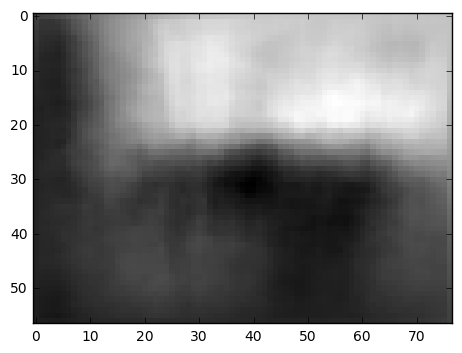

(1, 57, 77)
(57, 77, 1)


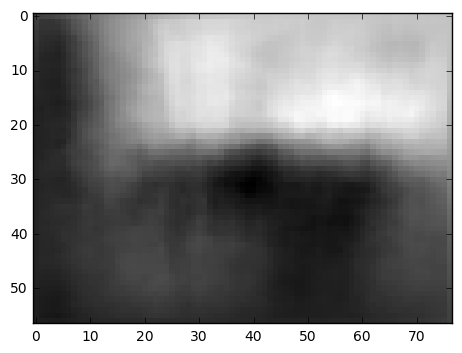

In [38]:
test1 = predsfine[0][0]
print(test1.shape)
plt.imshow(test1)
plt.show()
test2 = np.reshape(test1,(1,57,77))
print(test2.shape)
gb1 = np.zeros((57,77,1), dtype=np.float32)
gb1[:,:,0] = test2[0,:,:]
print(gb1.shape)
plt.imshow(gb1[:,:,0])
plt.show()

In [16]:
#callbacks will be defined here only....

csvlogger = CSVLogger('testingnewarch.log')

#earlyStopping=EarlyStopping(monitor='loss', patience=0, verbose=1, mode='auto')

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history11 = LossHistory()

def func1(epoch):
    print("Epoch value is ",epoch)
    if epoch >= 199:
        if epoch == 199:
            model2.save_weights("weight_newarch_epoch_"+str(epoch+1)+".h5")
            print("Weight is saved!!")
        lr = 0.0001
    elif epoch >= 149:
        if epoch == 149:
            model2.save_weights("weight_newarch_epoch_"+str(epoch+1)+".h5")
            print("Weight is saved!!")
        lr = 0.0005
    elif epoch >= 99:
        if epoch == 99:
            model2.save_weights("weight_newarch_epoch_"+str(epoch+1)+".h5")
            print("Weight is saved!!")
        lr = 0.001
    elif epoch >= 29:
        if epoch == 29:
            model2.save_weights("weight_newarch_epoch_"+str(epoch+1)+".h5")
            print("Weight is saved!!")
        lr = 0.005
    else:
        lr = 0.01
   
    return lr

changelr = LearningRateScheduler(func1)

callbacks_list = [csvlogger, history11, changelr]

In [18]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])
model2.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])

float32
float32
float32
float32
float32


In [ ]:
xt1 = sxtrain1[0]
cimg1 = np.zeros((240,320,3),dtype=np.float32)
cimg1[:,:,0] = xt1[0,:,:]
cimg1[:,:,1] = xt1[1,:,:]
cimg1[:,:,2] = xt1[2,:,:]

plt.imshow(cimg1)
plt.show()
plt.imshow(sytrain1[0])
plt.show()

print(cimg1.shape)
print(sytrain1[0].shape)

In [17]:
history = model2.fit(sxtrain2, sytrain2, nb_epoch=300, batch_size=10, verbose=1, validation_split=0.04, callbacks=callbacks_list)

Train on 1007 samples, validate on 42 samples
('Epoch value is ', 0)
Epoch 1/300
1007/1007 [==============================] - 124s - loss: 199.9997 - acc: 0.0137 - val_loss: 1.1360 - val_acc: 0.0138
('Epoch value is ', 1)
Epoch 2/300
1007/1007 [==============================] - 124s - loss: 87.8711 - acc: 0.0143 - val_loss: 0.8559 - val_acc: 0.0180
('Epoch value is ', 2)
Epoch 3/300
1007/1007 [==============================] - 124s - loss: 38.5880 - acc: 0.0155 - val_loss: 0.8020 - val_acc: 0.0201
('Epoch value is ', 3)
Epoch 4/300
1007/1007 [==============================] - 125s - loss: 17.2677 - acc: 0.0160 - val_loss: 0.7566 - val_acc: 0.0347
('Epoch value is ', 4)
Epoch 5/300
1007/1007 [==============================] - 124s - loss: 8.0276 - acc: 0.0179 - val_loss: 0.8600 - val_acc: 0.0727
('Epoch value is ', 5)
Epoch 6/300
1007/1007 [==============================] - 124s - loss: 4.0206 - acc: 0.0197 - val_loss: 0.8466 - val_acc: 0.0175
('Epoch value is ', 6)
Epoch 7/300
1007/100

In [36]:
#sxtest2.shape
#model2.save_weights("weight_newarch_epoch_300_coarse.h5")
np.save('historycoarse',history.history['loss'])

In [19]:
score = model2.evaluate(sxtest2,sytest2,batch_size=10)
print(score)
preds = model2.predict(sxtest2,verbose=1)

400/400 [==============================] - 36s    
[0.88528861477971077, 0.095350876450538635]
400/400 [==============================] - 24s    


1049/1049 [==============================] - 64s    
(1049, 57, 77)


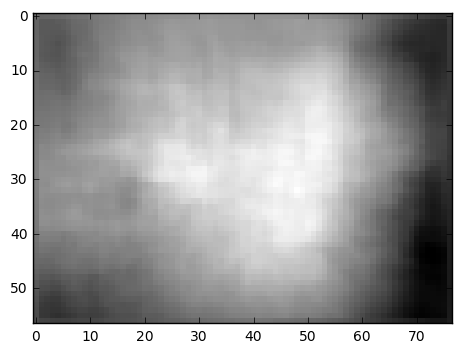

In [26]:
preds1 = model2.predict(sxtrain2,verbose=1)
print(preds1.shape)
plt.imshow(preds1[0])
plt.show()

In [32]:
len(history.history['loss'])

300

[[ 2.26736856  2.23473287  2.25941634 ...,  3.6753006   3.67023897
   3.65862441]
 [ 2.21346307  2.10748863  2.10993719 ...,  3.68836832  3.68113756
   3.65944195]
 [ 2.18837905  2.09060478  2.09059334 ...,  3.67714119  3.67393422
   3.65751553]
 ..., 
 [ 1.88827431  1.83533764  1.82036662 ...,  2.13210392  2.13912892
   2.2521894 ]
 [ 1.88221014  1.81448412  1.80423796 ...,  2.1216886   2.1286211
   2.23664737]
 [ 1.89507318  1.86664522  1.86077809 ...,  2.16521859  2.18084431
   2.23379135]]
(480, 640)


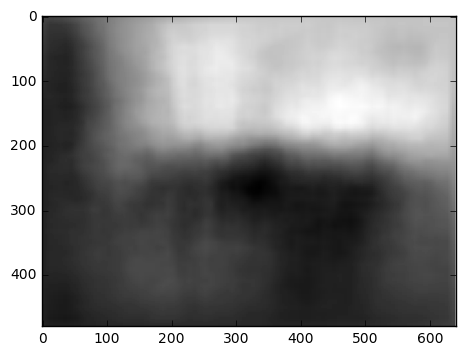

In [20]:
print(preds[0])
ans1 = imresize(preds[0],(480,640))
print(ans1.shape)
plt.imshow(ans1)
plt.show()

NameError: name 'preds' is not defined

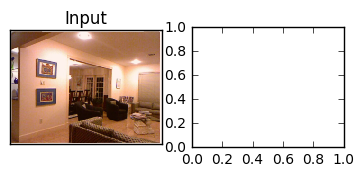

In [29]:
#print(score)
# preds[] is the predicated image
# finytest1 is the actual test image
#plt.pyplot.scatter(preds[3],finytest1[3])
from scipy.misc import imresize, imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
###################

plt.rcParams['image.cmap'] = 'hot'
plt.rcParams['image.interpolation'] = 'none'

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(9)
ind = 0
flag = 0
#imageinds = [135,228,398,12,307]
imageinds = [205,55,228,120,2]

for i in range(1,21,4):
    nind = imageinds[ind]
    img1 = np.zeros((240,320,3))
    temp = sxtest2[nind]
    #print(finxtest1[5].shape)

    img1[:,:,0] = temp[0,:,:]
    img1[:,:,1] = temp[1,:,:]
    img1[:,:,2] = temp[2,:,:]
    img1 = imresize(img1,(240,320,3))
    
    a=fig.add_subplot(5,4,i)
    imgplot = plt.imshow(img1)
    if flag == 0:
        a.set_title('Input')
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    a=fig.add_subplot(5,4,i+1)
    ##################################################
    imgplot = plt.imshow(imresize(preds[nind],(480,640)))
    if flag == 0:
        a.set_title('Predicted Depth')
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    ##################################################
    a=fig.add_subplot(5,4,i+2)
    imgplot = plt.imshow(sytest2[nind])
    if flag == 0:
        a.set_title('Actual Depth')
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    ##################################################
    a=fig.add_subplot(5,4,i+3)
    error1 = abs(preds[nind]-sytest2[nind])
    #print "max is --->", error1.max()
    #print "min is --->", error1.min()
    imgplot = plt.imshow(error1)
    if flag == 0:
        a.set_title('Absolute Error')
    #imgplot.set_rotation(0)
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    imgplot.set_cmap('Spectral')
    plt.colorbar(fraction=0.080, pad=0.03)
    #plt.colorbar(fraction=0.080, pad=0.03,ticks=[0.0,0.2,0.4,0.6])
    #plt.clim(0,1)
    plt.clim(vmin=0, vmax=0.7)
    ##################################################
    ind += 1
    flag = 1

#2nd image plots

In [30]:
#fine network testing...

sgd = SGD(lr=0.0001, decay=1e-3, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])
f1.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])

float32
float32
float32
float32
float32
float32
float32
float32
float32
float32


In [20]:
f1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  0           input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  0           block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [34]:
finehistory = f1.fit({'input_2':sxtrain2, 'fine_input':sxtrain2},{'outputFC':sytrain2,'outputfine':sytrain2}, nb_epoch=50, verbose=1)

Epoch 1/50
1049/1049 [==============================] - 88s - loss: 1.2555 - outputFC_loss: 0.3797 - outputfine_loss: 0.8091 - outputFC_acc: 0.1254 - outputfine_acc: 0.0554    
Epoch 2/50
1049/1049 [==============================] - 87s - loss: 1.2545 - outputFC_loss: 0.3794 - outputfine_loss: 0.8083 - outputFC_acc: 0.1260 - outputfine_acc: 0.0569    
Epoch 3/50
1049/1049 [==============================] - 88s - loss: 1.2519 - outputFC_loss: 0.3779 - outputfine_loss: 0.8072 - outputFC_acc: 0.1270 - outputfine_acc: 0.0572    
Epoch 4/50
1049/1049 [==============================] - 88s - loss: 1.2553 - outputFC_loss: 0.3802 - outputfine_loss: 0.8083 - outputFC_acc: 0.1276 - outputfine_acc: 0.0555    
Epoch 5/50
1049/1049 [==============================] - 90s - loss: 1.2538 - outputFC_loss: 0.3790 - outputfine_loss: 0.8081 - outputFC_acc: 0.1280 - outputfine_acc: 0.0558    
Epoch 6/50
1049/1049 [==============================] - 88s - loss: 1.2547 - outputFC_loss: 0.3797 - outputfine_los

In [35]:
scorefine = f1.evaluate([sxtest2,sxtest2],[sytest2,sytest2],batch_size=10)
print(scorefine)
predsfine = f1.predict([sxtest2,sxtest2],verbose=1)

400/400 [==============================] - 38s    
[2.0439214020967484, 0.88528861477971077, 1.1586327806115151, 0.095350876450538635, 0.030570175661705435]
400/400 [==============================] - 26s    


In [28]:
predsfine[1].shape

(400, 57, 77)

In [112]:
print(len(f1.layers))
temp12 = f1.get_layer("convolution2d_1")
#f3 = temp12.get_weights()
print(f1.layers[24].output_shape)
print(f1.layers[26].output_shape)
print(f1.layers[27].output_shape)
print(f1.layers[29].output_shape)
print(f1.layers[30].output_shape)
print(f1.layers[27].output)
c1 = f1.get_layer("lambda_2")
print(c1.output_shape)
print(f1.layers[25].input_shape)

#print(np.max(f3[0]))
#print(np.min(f3[0]))

36
(None, 57, 77)
(None, 63, 114, 154)
(None, 1, 57, 77)
(None, 1, 57, 77)
(None, 64, 57, 77)
Reshape{4}.0
(None, 1, 57, 77)
(None, 3, 240, 320)


In [116]:
check1 = Model(input=[f1.layers[25].input, f1.layers[0].input], output=[f1.get_layer("merge_3").output])
sgd = SGD(lr=0.00001, decay=1e-4, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])
check1.compile(optimizer=sgd, loss=custom_rmse1, metrics=['accuracy'])

float32
float32
float32
float32
float32


In [117]:
gt1 = check1.predict([sxtest2,sxtest2], verbose=1)

400/400 [==============================] - 26s    


In [118]:
gt1.shape

(400, 64, 57, 77)

In [119]:
print(gt1[0][63])
print(np.max(gt1[0][63]))
print(np.min(gt1[0][63]))

[[ 0.22673686  0.2234733   0.22594164 ...,  0.36753008  0.36702392
   0.36586246]
 [ 0.2213463   0.21074887  0.21099372 ...,  0.36883685  0.36811376
   0.36594421]
 [ 0.2188379   0.20906048  0.20905934 ...,  0.36771414  0.36739343
   0.36575156]
 ..., 
 [ 0.18882744  0.18353377  0.18203667 ...,  0.21321039  0.21391289
   0.22521894]
 [ 0.18822102  0.18144841  0.1804238  ...,  0.21216886  0.21286212
   0.22366475]
 [ 0.18950732  0.18666452  0.18607782 ...,  0.21652186  0.21808444
   0.22337914]]
0.432178
0.152697


In [84]:
print(gt1[0][0])
print(np.max(gt1[0][0]))
print(np.min(gt1[0][0]))

[[ 0.16695783  0.14997868  0.17020696 ...,  0.1208433   0.11292421
   0.16909139]
 [ 0.04123491  0.02231428  0.00521007 ...,  0.04285018  0.04475092
   0.09918404]
 [ 0.02657757  0.082155    0.03960749 ...,  0.04653195  0.0443592
   0.1004127 ]
 ..., 
 [ 0.04851027  0.0339893   0.03577344 ...,  0.01179326  0.01073952
   0.1085455 ]
 [ 0.03973387  0.03447216  0.02431712 ...,  0.00981638  0.00940683
   0.09703006]
 [ 0.06988771  0.09396659  0.09985007 ...,  0.09610568  0.06245964
   0.13046074]]
0.22697
0.0


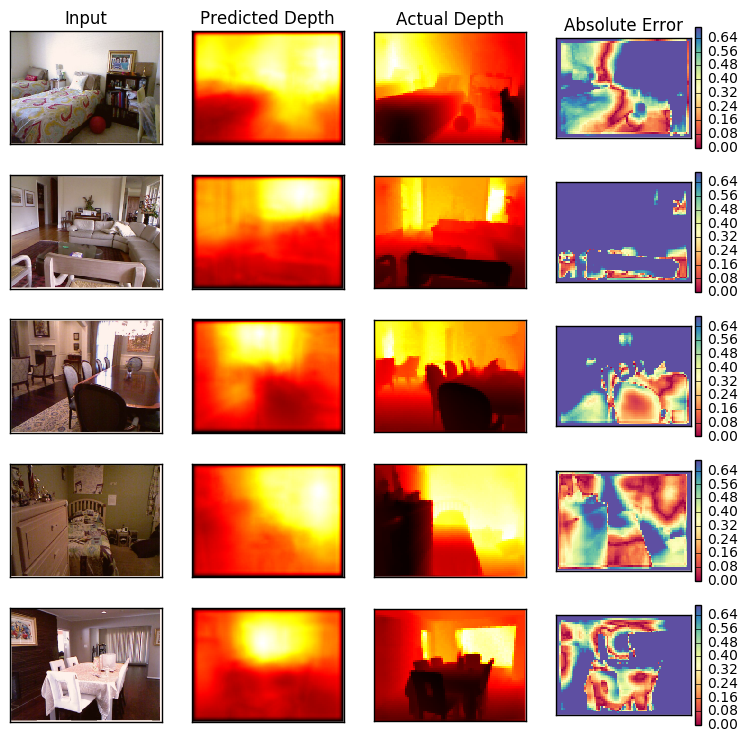

In [36]:
#print(score)
# preds[] is the predicated image
# finytest1 is the actual test image
#plt.pyplot.scatter(preds[3],finytest1[3])
-

In [101]:
f1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 240, 320)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 240, 320)  0           input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 240, 320)  0           block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 120, 160)  0           block1_conv2[0][0]               
___________________________________________________________________________________________